# Importamos librerias 

In [1489]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score

# Importar dataset

In [1490]:
dataset= pd.read_csv('IAcardio.csv')
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [1491]:
#sbp: presión arterial sistólica, ldl : proteina de baja densidad del colesterol,
columnas = ['sbp','Tabaco','ldl','Adiposity','Familia','Tipo','Obesidad','Alcohol','Edad','chd']

In [1492]:
dataset.columns = columnas
dataset.head()

,sbp,Tabaco,ldl,Adiposity,Familia,Tipo,Obesidad,Alcohol,Edad,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [1493]:
from sklearn.preprocessing import LabelEncoder

In [1494]:
encoder = LabelEncoder()
dataset['Familia']=encoder.fit_transform(dataset['Familia'])
dataset['chd']=encoder.fit_transform(dataset['chd'])
del(dataset['Tipo'])
dataset.head()

,sbp,Tabaco,ldl,Adiposity,Familia,Obesidad,Alcohol,Edad,chd
0,160,12.00,5.73,23.11,0,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,25.99,57.34,49,1


<AxesSubplot:xlabel='Edad', ylabel='Obesidad'>

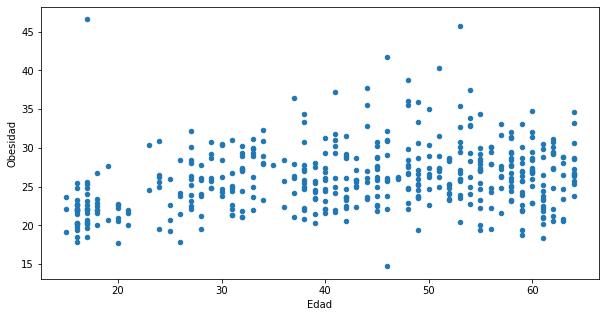

In [1509]:
#Visualizar la obesidad de acuerdo a la edad
dataset.plot(x='Edad',y='Obesidad',kind='scatter',figsize =(10,5))

<AxesSubplot:xlabel='Edad', ylabel='Tabaco'>

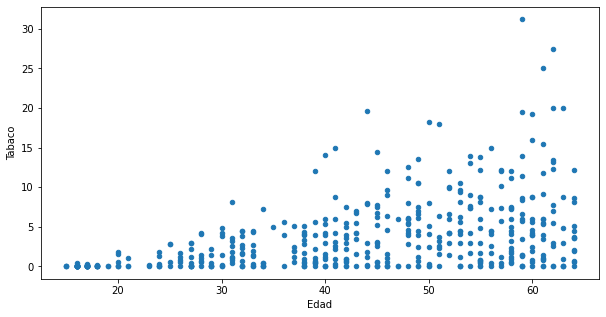

In [1511]:
#Visualizar el consumo de tabaco de acuerdo a la edad
dataset.plot(x='Edad',y='Tabaco',kind='scatter',figsize =(10,5))

<AxesSubplot:xlabel='Edad', ylabel='Alcohol'>

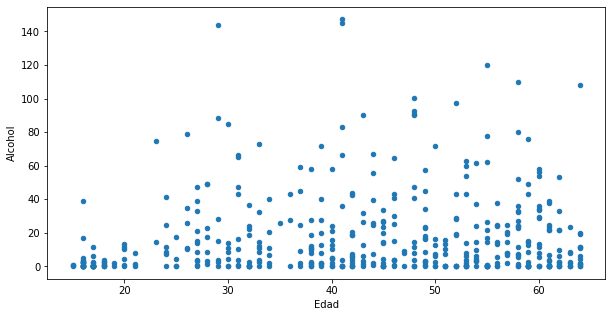

In [1512]:
#Visualizar el consumo de alcohol de acuerdo a la edad
dataset.plot(x='Edad',y='Alcohol',kind='scatter',figsize =(10,5))

# Datos a entrenar

In [1495]:
X = dataset.iloc[:,0:7].values
y = dataset.iloc[:, 8].values

In [1496]:
#division de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.26,random_state = 0)

# Normalizando datos

In [1500]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# GridSearch

In [1497]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 0.5, 1, 10, 100, 1000], 'gamma':[0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             verbose=1)

In [1498]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [1499]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

# Support Vector Machine

In [1501]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

classifier = SVC(kernel="rbf",C= 1000, gamma= 0.0001) # este algoritmo pide un C que es un factor de regularización

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [1502]:
accuracy_score(y_test, y_pred)

0.7355371900826446

In [1503]:
precision_score(y_test, y_pred)

0.6551724137931034